# SCoT with Claude

In [ ]:
# Mars Image Classification: Impact Craters vs Volcanic Depressions
# CNN using TensorFlow/Keras for 128x128 grayscale images

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os

In [ ]:
# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Mounted at /content/drive


In [ ]:
# Check if dataset exists
dataset_path = '/content/drive/MyDrive/Dissertation/FinalDataset'
if not os.path.exists(dataset_path):
    print(f"Dataset not found at {dataset_path}")
    print("Please check the path and ensure the dataset is uploaded to Google Drive")
else:
    print(f"Dataset found at {dataset_path}")

Dataset found at /content/drive/MyDrive/Dissertation/FinalDataset


In [ ]:
# Define paths
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

In [ ]:

# Image parameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 50

# Data Preprocessing and Augmentation
print("Setting up data generators...")

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Validation and test data generators (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Class indices: {train_generator.class_indices}")

# Define CNN Architecture
def create_mars_classifier():
    """
    CNN architecture designed to detect morphological differences:
    - Impact craters: circular with raised rims
    - Volcanic depressions: elliptical and collapsed
    """
    model = keras.Sequential([
        # Input layer
        layers.Input(shape=(128, 128, 1)),

        # First convolutional block - detect basic edges and patterns
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second convolutional block - detect shapes and contours
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third convolutional block - detect complex morphological features
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Fourth convolutional block - high-level feature extraction
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        # Output layer for binary classification
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create and compile the model
print("Creating CNN model...")
model = create_mars_classifier()

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# Display model summary
model.summary()

Setting up data generators...
Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Training samples: 2400
Validation samples: 300
Test samples: 300
Class indices: {'Impact': 0, 'Volcanic': 1}
Creating CNN model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,04

 Total params: 9,696,353 (36.99 MB)

 Trainable params: 9,694,369 (36.98 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:

# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='/content/best_mars_classifier.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

# Train the model
print("Starting training...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)


Starting training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5152 - loss: 0.9776 - precision: 0.5244 - recall: 0.5114
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/best_mars_classifier.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 505s 7s/step - accuracy: 0.5155 - loss: 0.9768 - precision: 0.5246 - recall: 0.5116 - val_accuracy: 0.5000 - val_loss: 0.9405 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5654 - loss: 0.8072 - precision: 0.5667 - recall: 0.4967
Epoch 2: val_accuracy did not improve from 0.50000
75/75 ━━━━━━━━━━━━━━━━━━━━ 406s 5s/step - accuracy: 0.5655 - loss: 0.8072 - precision: 0.5668 - recall: 0.4972 - val_accuracy: 0.5000 - val_loss: 1.6233 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6541 - loss: 0.6917 - precision: 0.6686 - recall: 0.6308
Epoch 3: val_accuracy did not improve from 0.50000
75/75 ━━━━━━━━━━━━━━━━━━━━ 450s 5s/step - accuracy: 0.6544 - loss: 0.6912 - precision: 0.6689 - recall: 0.6310 - val_accuracy: 0.5000 - val_loss: 2.0006 - val_precision: 0.0000e+00 - val_recall: 0.0

75/75 ━━━━━━━━━━━━━━━━━━━━ 393s 5s/step - accuracy: 0.8283 - loss: 0.4080 - precision: 0.8179 - recall: 0.8504 - val_accuracy: 0.5867 - val_loss: 0.9495 - val_precision: 0.9643 - val_recall: 0.1800 - learning_rate: 5.0000e-04
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8278 - loss: 0.3913 - precision: 0.8197 - recall: 0.8487
Epoch 9: val_accuracy improved from 0.58667 to 0.78000, saving model to /content/best_mars_classifier.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.8278 - loss: 0.3915 - precision: 0.8196 - recall: 0.8487 - val_accuracy: 0.7800 - val_loss: 0.4769 - val_precision: 0.8962 - val_recall: 0.6333 - learning_rate: 5.0000e-04
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8386 - loss: 0.4247 - precision: 0.8214 - recall: 0.8696
Epoch 10: val_accuracy did not improve from 0.78000
75/75 ━━━━━━━━━━━━━━━━━━━━ 445s 6s/step - accuracy: 0.8385 - loss: 0.4244 - precision: 0.8213 - recall: 0.8695 - val_accuracy: 0.5600 - val_loss: 1.3266 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8391 - loss: 0.3924 - precision: 0.8100 - recall: 0.8737
Epoch 11: val_accuracy improved from 0.78000 to 0.79333, saving model to /content/best_mars_classifier.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 458s 6s/step - accuracy: 0.8391 - loss: 0.3923 - precision: 0.8102 - recall: 0.8737 - val_accuracy: 0.7933 - val_loss: 0.4677 - val_precision: 0.9231 - val_recall: 0.6400 - learning_rate: 5.0000e-04
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8527 - loss: 0.3666 - precision: 0.8145 - recall: 0.8941
Epoch 12: val_accuracy improved from 0.79333 to 0.88333, saving model to /content/best_mars_classifier.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 455s 6s/step - accuracy: 0.8527 - loss: 0.3665 - precision: 0.8147 - recall: 0.8939 - val_accuracy: 0.8833 - val_loss: 0.3160 - val_precision: 0.8859 - val_recall: 0.8800 - learning_rate: 5.0000e-04
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8650 - loss: 0.3373 - precision: 0.8337 - recall: 0.9124
Epoch 13: val_accuracy did not improve from 0.88333
75/75 ━━━━━━━━━━━━━━━━━━━━ 448s 6s/step - accuracy: 0.8651 - loss: 0.3370 - precision: 0.8339 - recall: 0.9124 - val_accuracy: 0.8133 - val_loss: 0.3793 - val_precision: 0.8406 - val_recall: 0.7733 - learning_rate: 5.0000e-04
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8631 - loss: 0.3228 - precision: 0.8353 - recall: 0.9020
Epoch 14: val_accuracy did not improve from 0.88333
75/75 ━━━━━━━━━━━━━━━━━━━━ 439s 6s/step - accuracy: 0.8633 - loss: 0.3224 - precision: 0.8356 - recall: 0.9020 - val_accuracy: 0.7233 - val_loss: 0.6574 - val_precision: 1.0000 - val_recall: 0.4467 - le

75/75 ━━━━━━━━━━━━━━━━━━━━ 445s 6s/step - accuracy: 0.8933 - loss: 0.2756 - precision: 0.8681 - recall: 0.9238 - val_accuracy: 0.9300 - val_loss: 0.2107 - val_precision: 0.9640 - val_recall: 0.8933 - learning_rate: 5.0000e-04
Epoch 16/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8987 - loss: 0.2642 - precision: 0.8738 - recall: 0.9293
Epoch 16: val_accuracy did not improve from 0.93000
75/75 ━━━━━━━━━━━━━━━━━━━━ 449s 6s/step - accuracy: 0.8987 - loss: 0.2640 - precision: 0.8739 - recall: 0.9292 - val_accuracy: 0.9067 - val_loss: 0.2522 - val_precision: 0.9919 - val_recall: 0.8200 - learning_rate: 5.0000e-04
Epoch 17/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9081 - loss: 0.2511 - precision: 0.8916 - recall: 0.9302
Epoch 17: val_accuracy improved from 0.93000 to 0.94000, saving model to /content/best_mars_classifier.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 440s 6s/step - accuracy: 0.9080 - loss: 0.2512 - precision: 0.8915 - recall: 0.9303 - val_accuracy: 0.9400 - val_loss: 0.1922 - val_precision: 0.9342 - val_recall: 0.9467 - learning_rate: 5.0000e-04
Epoch 18/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9110 - loss: 0.2450 - precision: 0.8934 - recall: 0.9331
Epoch 18: val_accuracy did not improve from 0.94000
75/75 ━━━━━━━━━━━━━━━━━━━━ 432s 6s/step - accuracy: 0.9111 - loss: 0.2448 - precision: 0.8934 - recall: 0.9331 - val_accuracy: 0.9333 - val_loss: 0.2285 - val_precision: 0.9924 - val_recall: 0.8733 - learning_rate: 5.0000e-04
Epoch 19/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9158 - loss: 0.2287 - precision: 0.8906 - recall: 0.9425
Epoch 19: val_accuracy did not improve from 0.94000
75/75 ━━━━━━━━━━━━━━━━━━━━ 450s 6s/step - accuracy: 0.9157 - loss: 0.2287 - precision: 0.8906 - recall: 0.9424 - val_accuracy: 0.9133 - val_loss: 0.1937 - val_precision: 0.8827 - val_recall: 0.9533 - le

75/75 ━━━━━━━━━━━━━━━━━━━━ 439s 6s/step - accuracy: 0.9413 - loss: 0.1795 - precision: 0.9289 - recall: 0.9525 - val_accuracy: 0.9667 - val_loss: 0.0962 - val_precision: 0.9545 - val_recall: 0.9800 - learning_rate: 2.5000e-04
Epoch 24/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9411 - loss: 0.1628 - precision: 0.9113 - recall: 0.9743
Epoch 24: val_accuracy did not improve from 0.96667
75/75 ━━━━━━━━━━━━━━━━━━━━ 441s 6s/step - accuracy: 0.9412 - loss: 0.1628 - precision: 0.9115 - recall: 0.9742 - val_accuracy: 0.9133 - val_loss: 0.2416 - val_precision: 0.9921 - val_recall: 0.8333 - learning_rate: 2.5000e-04
Epoch 25/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9485 - loss: 0.1590 - precision: 0.9353 - recall: 0.9634
Epoch 25: val_accuracy improved from 0.96667 to 0.97333, saving model to /content/best_mars_classifier.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 448s 6s/step - accuracy: 0.9484 - loss: 0.1591 - precision: 0.9352 - recall: 0.9634 - val_accuracy: 0.9733 - val_loss: 0.1058 - val_precision: 0.9733 - val_recall: 0.9733 - learning_rate: 2.5000e-04
Epoch 26/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9509 - loss: 0.1464 - precision: 0.9339 - recall: 0.9699
Epoch 26: val_accuracy did not improve from 0.97333
75/75 ━━━━━━━━━━━━━━━━━━━━ 450s 6s/step - accuracy: 0.9509 - loss: 0.1465 - precision: 0.9339 - recall: 0.9698 - val_accuracy: 0.9267 - val_loss: 0.1700 - val_precision: 0.9923 - val_recall: 0.8600 - learning_rate: 2.5000e-04
Epoch 27/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9404 - loss: 0.1655 - precision: 0.9149 - recall: 0.9682
Epoch 27: val_accuracy did not improve from 0.97333
75/75 ━━━━━━━━━━━━━━━━━━━━ 444s 6s/step - accuracy: 0.9405 - loss: 0.1654 - precision: 0.9150 - recall: 0.9681 - val_accuracy: 0.9667 - val_loss: 0.0924 - val_precision: 0.9545 - val_recall: 0.9800 - le

75/75 ━━━━━━━━━━━━━━━━━━━━ 434s 6s/step - accuracy: 0.9336 - loss: 0.1743 - precision: 0.9059 - recall: 0.9661 - val_accuracy: 0.9833 - val_loss: 0.0638 - val_precision: 0.9739 - val_recall: 0.9933 - learning_rate: 2.5000e-04
Epoch 32/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9560 - loss: 0.1342 - precision: 0.9420 - recall: 0.9712
Epoch 32: val_accuracy did not improve from 0.98333
75/75 ━━━━━━━━━━━━━━━━━━━━ 442s 6s/step - accuracy: 0.9560 - loss: 0.1344 - precision: 0.9419 - recall: 0.9712 - val_accuracy: 0.9600 - val_loss: 0.1139 - val_precision: 1.0000 - val_recall: 0.9200 - learning_rate: 2.5000e-04
Epoch 33/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9506 - loss: 0.1448 - precision: 0.9460 - recall: 0.9579
Epoch 33: val_accuracy did not improve from 0.98333
75/75 ━━━━━━━━━━━━━━━━━━━━ 429s 6s/step - accuracy: 0.9506 - loss: 0.1448 - precision: 0.9459 - recall: 0.9580 - val_accuracy: 0.8333 - val_loss: 0.4495 - val_precision: 1.0000 - val_recall: 0.6667 - le

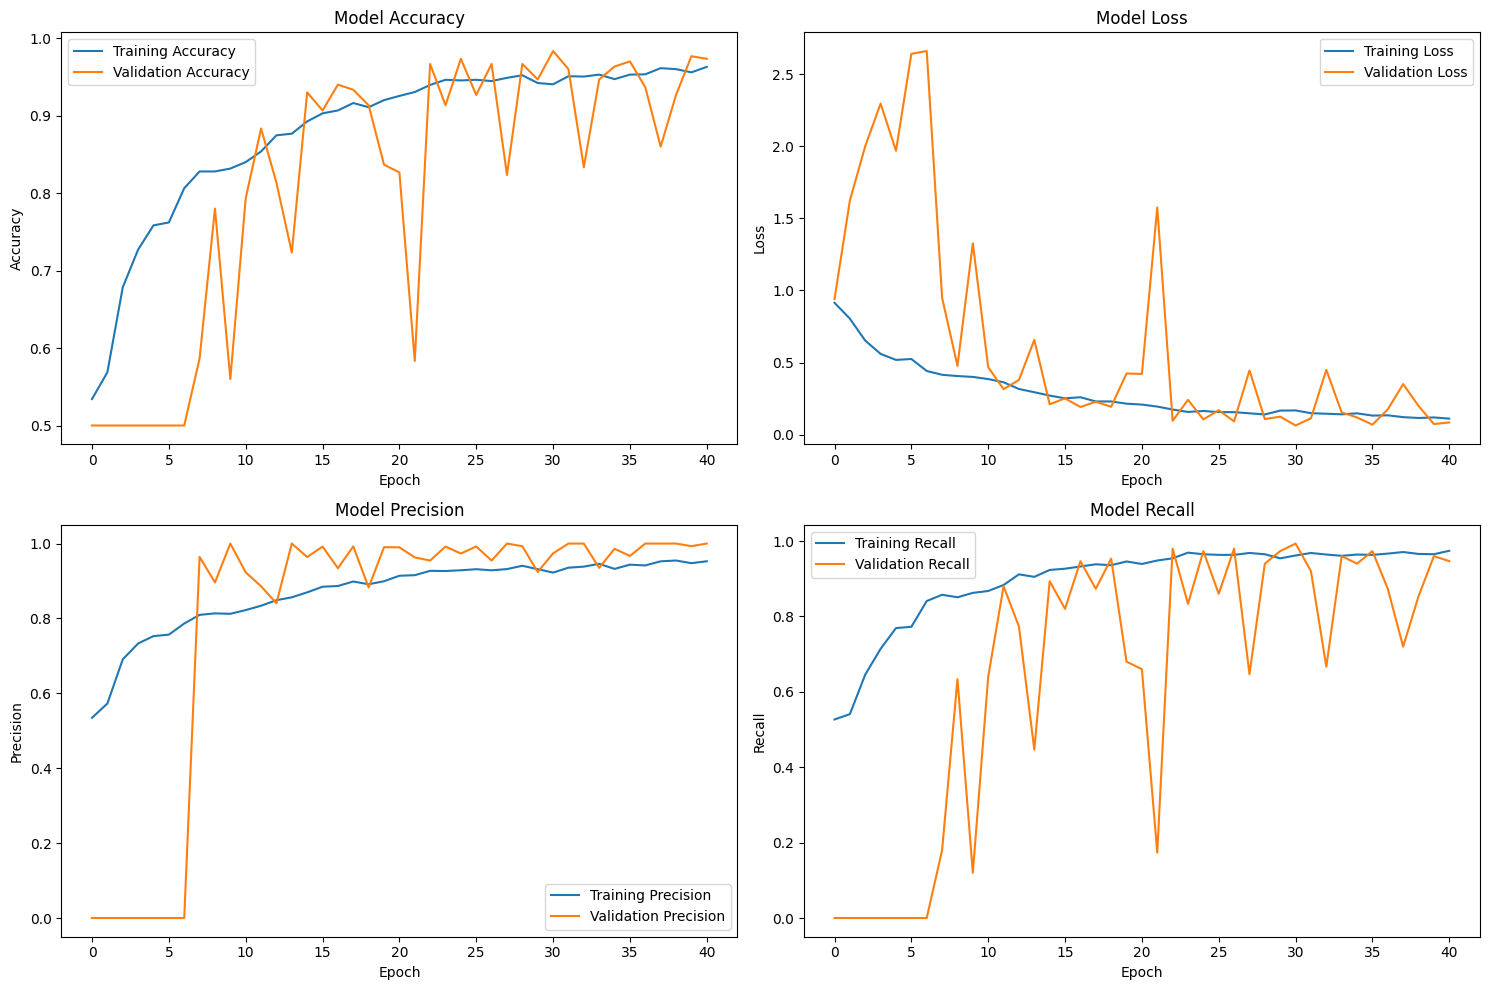

Evaluating on test set...
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.9596 - loss: 0.0930 - precision: 0.5593 - recall: 0.6265

Test Results:
Test Accuracy: 0.9667
Test Precision: 0.9545
Test Recall: 0.9800
Test F1-Score: 0.9671
Generating predictions for detailed analysis...
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step

Classification Report:
Classes: ['Impact', 'Volcanic']
              precision    recall  f1-score   support

      Impact       0.98      0.95      0.97       150
    Volcanic       0.95      0.98      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



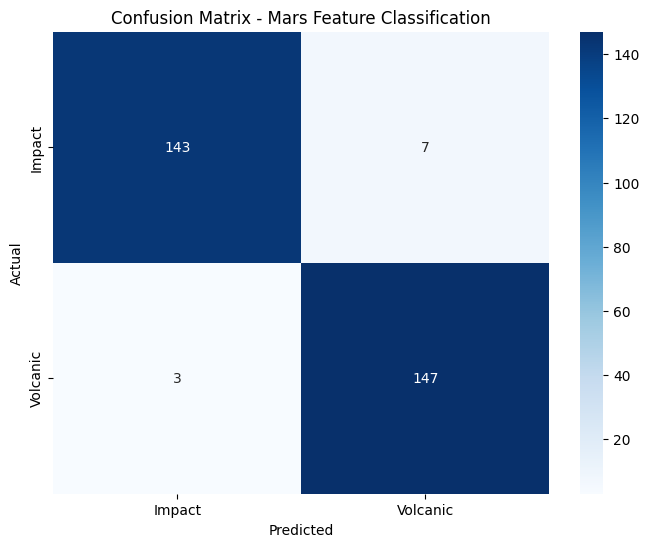

Visualizing sample predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


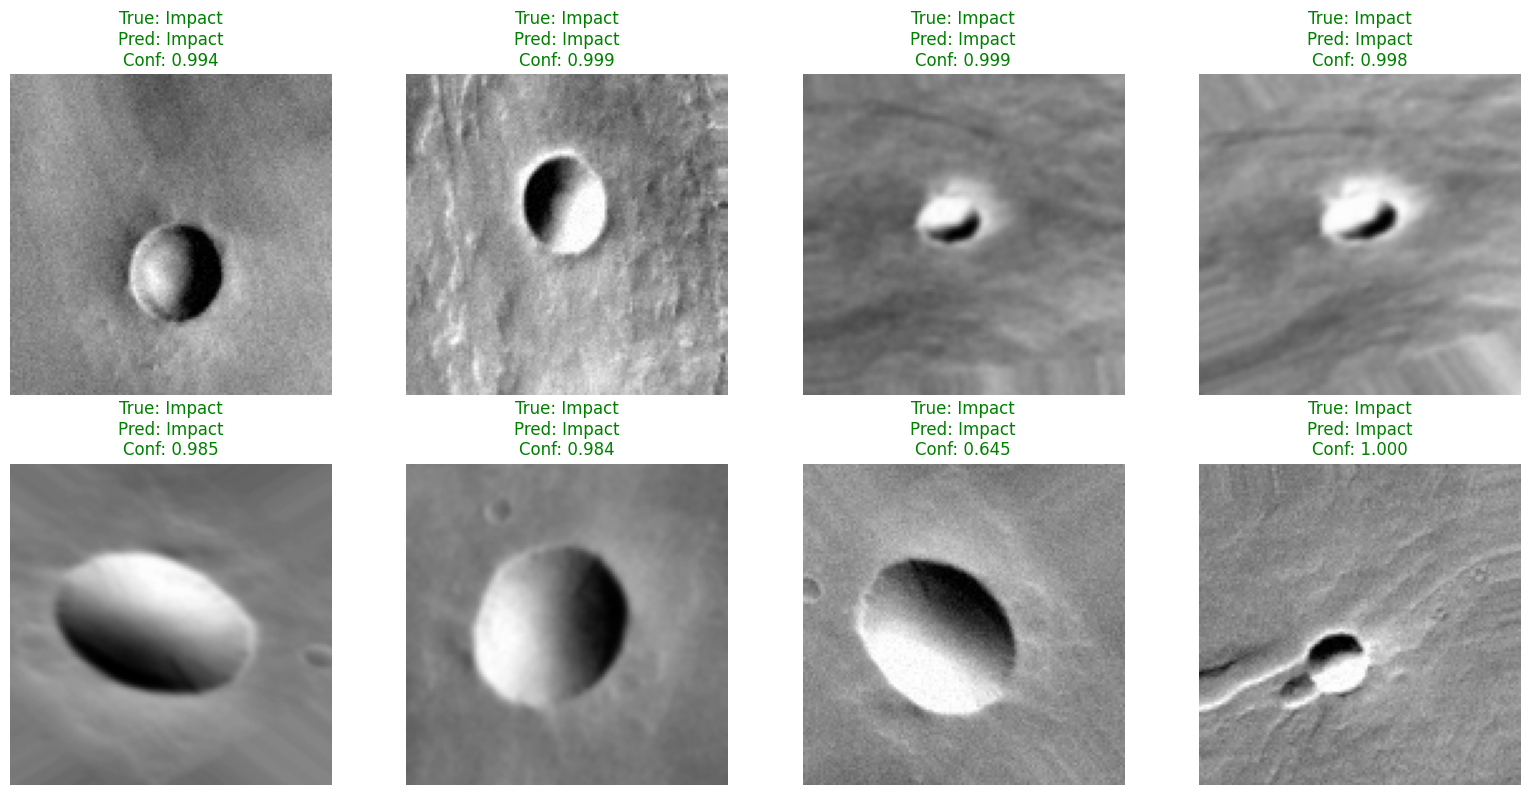

In [ ]:

# Plot training history
def plot_training_history(history):
    """Plot training and validation metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Training Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Training Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Model Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Model Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator, verbose=1)

print(f"\nTest Results:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {2 * (test_precision * test_recall) / (test_precision + test_recall):.4f}")

# Generate predictions and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Generating predictions for detailed analysis...")
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes

# Classification report
class_names = list(test_generator.class_indices.keys())
print(f"\nClassification Report:")
print(f"Classes: {class_names}")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Mars Feature Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Sample predictions visualization
def visualize_predictions(generator, model, num_samples=8):
    """Visualize sample predictions"""
    generator.reset()
    batch_images, batch_labels = next(generator)
    predictions = model.predict(batch_images[:num_samples])

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.ravel()

    class_names = list(generator.class_indices.keys())

    for i in range(num_samples):
        axes[i].imshow(batch_images[i].squeeze(), cmap='gray')

        true_label = class_names[int(batch_labels[i])]
        pred_prob = predictions[i][0]
        pred_label = class_names[int(pred_prob > 0.5)]
        confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob

        color = 'green' if true_label == pred_label else 'red'
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.3f}',
                         color=color)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("Visualizing sample predictions...")
visualize_predictions(test_generator, model)


# Save

In [ ]:
# Create folder if it doesn't exist
import os
save_dir = "/content/drive/MyDrive/Dissertation/Models"
os.makedirs(save_dir, exist_ok=True)

# Save model
model.save(os.path.join(save_dir, "EXP_007.h5"))
print(f"Model saved to {os.path.join(save_dir, 'EXP_007.h5')}")

import pickle

# Save history object
with open(os.path.join(save_dir, "EXP_007_history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

print(f"History saved to {os.path.join(save_dir, 'EXP_007_history.pkl')}")


Model saved to /content/drive/MyDrive/Dissertation/Models/EXP_007.h5
History saved to /content/drive/MyDrive/Dissertation/Models/EXP_007_history.pkl
